In [2]:
library(dbnR)
library(bnlearn)
library(visNetwork)
library(dplyr)
library(tidyr)
library(depmixS4)
library(tidyverse)


Loading required package: bnlearn


Attaching package: ‘dbnR’


The following objects are masked from ‘package:bnlearn’:

    degree, nodes, nodes<-, score



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: nnet

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Rsolnp

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.2     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ nlme::coll

In [3]:
data = read.csv("/Users/jbel/UROP_transportation/data/I80_density.csv")
data = data[c("X400126", "X400176", "X401698", "X405602")]
data = data %>% 
  mutate(
    across(everything(), ~replace_na(.x, 0))
  )

white_list <- rbind(c("X400176_t_0", "X400126_t_0"),
                    c("X400126_t_0", "X405602_t_0"),
                    c("X405602_t_0", "X401698_t_0"))

black_list <- rbind(c("X400126_t_0", "X400176_t_0"),
                    c("X405602_t_0", "X400126_t_0"),
                    c("X401698_t_0", "X405602_t_0"))


In [4]:
data

X400126,X400176,X401698,X405602
<dbl>,<dbl>,<dbl>,<dbl>
0.0255,0.0194,0.0235,0.0223
0.0248,0.0190,0.0168,0.0204
0.0217,0.0165,0.0205,0.0198
0.0199,0.0149,0.0177,0.0171
0.0213,0.0166,0.0164,0.0200
0.0181,0.0147,0.0173,0.0177
0.0191,0.0151,0.0156,0.0163
0.0181,0.0163,0.0143,0.0171
0.0196,0.0139,0.0163,0.0187


In [5]:
train = data[0:210000,]
test = data[210000:211968,]



In [6]:
net = learn_dbn_struc(train, 3, method = "dmmhc", whitelist=white_list, blacklist=black_list)

Warning message in unique.arcs(arcs, nodes, warn = TRUE):
“removed 3 duplicate arcs.”


In [ ]:
plot_dynamic_network(net)

In [1]:
f_dt_train = fold_dt(train, 3)
fit = fit_dbn_params(net, f_dt_train)

ERROR: Error in fold_dt(train, 3): could not find function "fold_dt"


In [ ]:
pred = predict_dt(fit, fold_dt(test, 3), obj_nodes = c("X400176_t_0"), look_ahead=FALSE)

In [61]:
RSQUARE = function(y_actual,y_predict){
  cor(y_actual,y_predict)^2
}

In [118]:
RSQUARE(pred[1:nrow(pred), "X400176_t_0"], test[2:nrow(test),"X400176"])

X400176_t_0,0.9090271


In [111]:
RSQUARE(pred[1:nrow(pred), "X400176_t_0"], test[3:nrow(test),"X400176"])

X400176_t_0,0.9088302


In [113]:
RSQUARE(test[1:(nrow(test)-2),"X400176"], test[3:nrow(test),"X400176"])

[1] 0.8339508

In [ ]:
n = 288
plot = ggplot() + 
    geom_line(data = pred[1:n], aes(x = c(1:n), y = X400176_t_0[1:n]), color="red") + 
    geom_line(data = test[3:n,], aes(x = c(1:(n-2)), y = X405602[1:(n-2)]), color="blue") + 
    labs(x = "5 Minute Interval", y = "Occupancy (Density)")

options(repr.plot.width=10, repr.plot.height=4)

ggsave(file="prediction.pdf", width=10, height=4, dpi=300)

plot

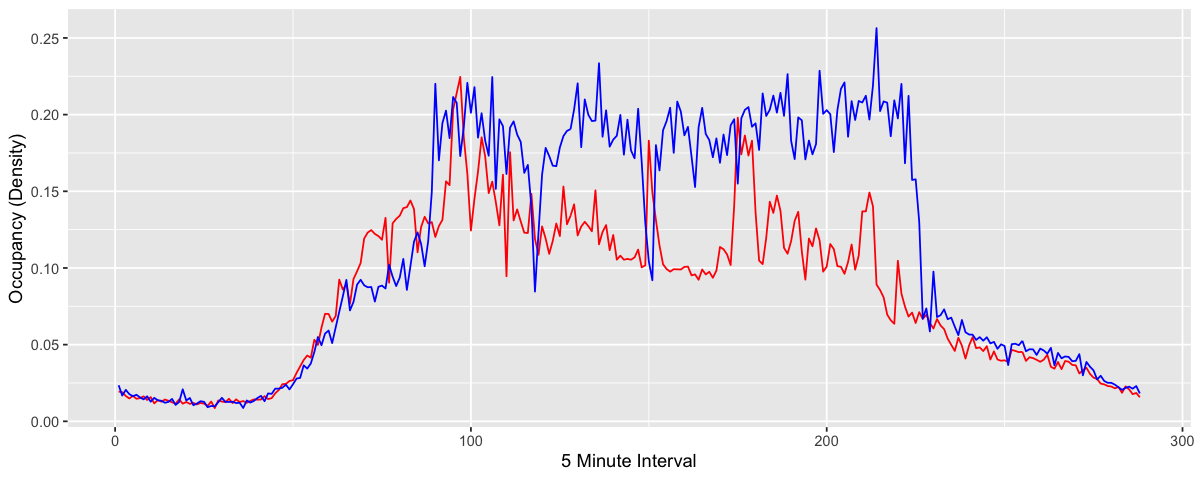

In [119]:
n = 288

plot = ggplot() + geom_line(data = train[1:n,], aes(x = c(1:n), y = X400176), color="red") + 
    geom_line(data = train[1:n,], aes(x = c(1:n), y = X401698), color="blue") + 
    labs(x = "5 Minute Interval", y = "Occupancy (Density)")

options(repr.plot.width=10, repr.plot.height=4)

ggsave(file="detector_comparison.pdf", width=10, height=4, dpi=300)


plot

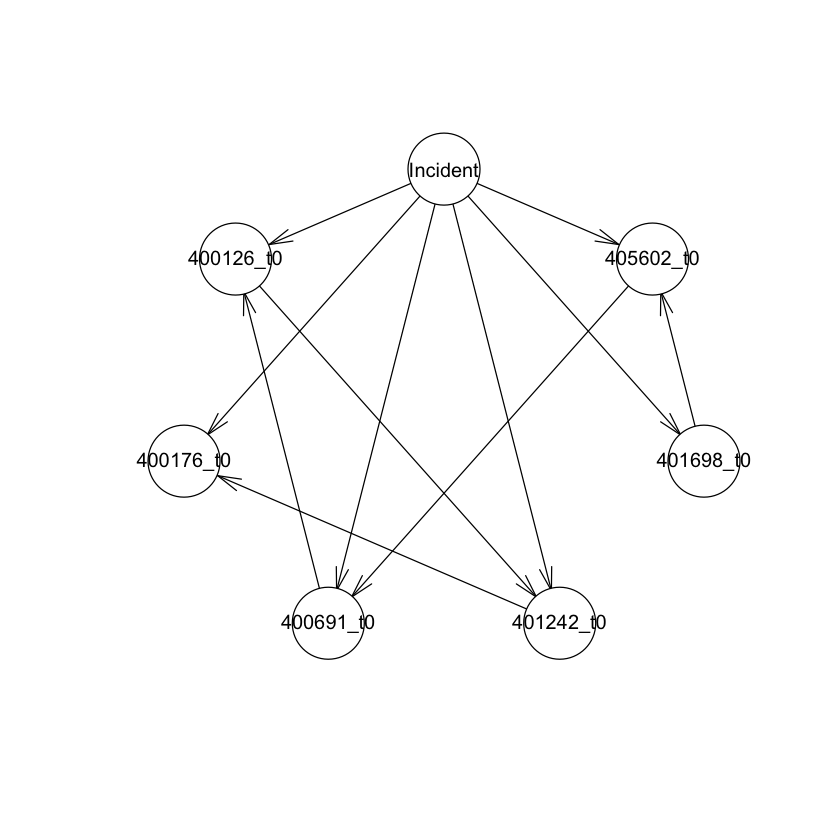

In [187]:
nodes = "[Incident]"
nodes = paste(nodes, "[401698_t0|Incident]", sep="")
nodes = paste(nodes, "[405602_t0|401698_t0:Incident]", sep="")
nodes = paste(nodes, "[400691_t0|405602_t0:Incident]", sep="")
nodes = paste(nodes, "[400126_t0|400691_t0:Incident]", sep="")
nodes = paste(nodes, "[401242_t0|400126_t0:Incident]", sep="")
nodes = paste(nodes, "[400176_t0|401242_t0:Incident]", sep="")

dag = model2network(nodes)
plot(dag)

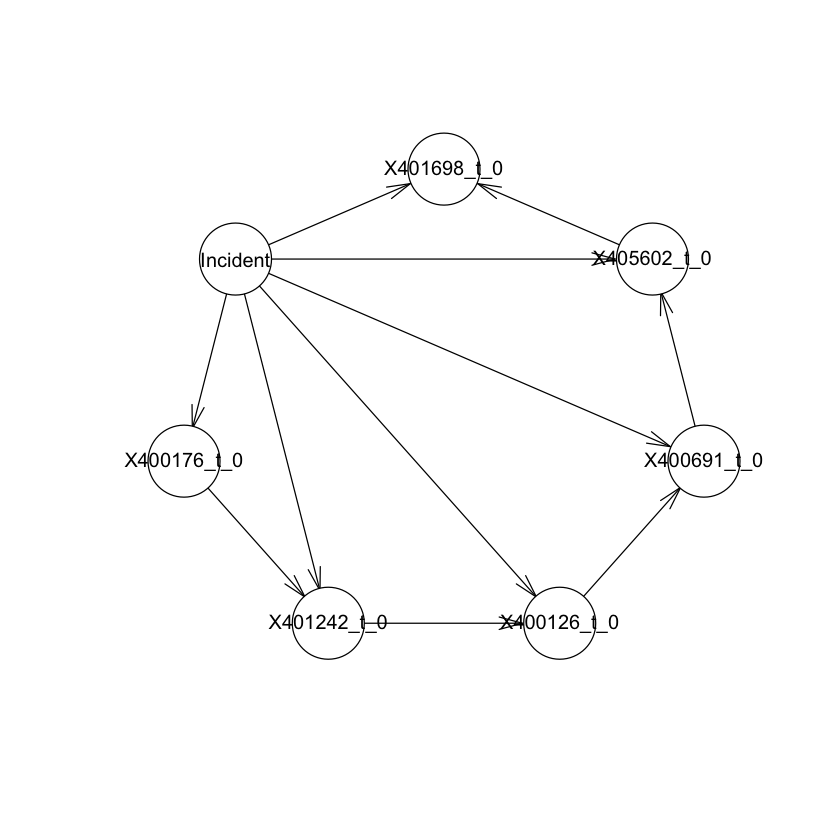

In [168]:
nodes = c("Incident", "X400176_t_0","X401242_t_0","X400126_t_0","X400691_t_0","X405602_t_0","X401698_t_0")

dag <- empty.graph(nodes=nodes)

arc.set <- rbind(c("X400176_t_0", "X401242_t_0"),
                    c("X401242_t_0", "X400126_t_0"),
                    c("X400126_t_0", "X400691_t_0"),
                    c("X400691_t_0", "X405602_t_0"),
                    c("X405602_t_0", "X401698_t_0"))

arc.set <- rbind(arc.set, c("Incident", "X400176_t_0"),
                          c("Incident", "X401242_t_0"),
                          c("Incident", "X400126_t_0"),
                          c("Incident", "X400691_t_0"),
                          c("Incident", "X405602_t_0"),
                          c("Incident", "X401698_t_0"))

arcs(dag) <- arc.set
plot(dag)